In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [65]:
def get_percentage_of_missing_values(code_bss, fname, stop_at="2021-10-15"):
    """Download the last 20000 measures up to <stop_at> and compute the percentage of missing dates
    """
    url = f'https://hubeau.eaufrance.fr/api/v1/niveaux_nappes/chroniques.csv?code_bss={code_bss}&size=20000&sort=desc&date_fin_mesure={stop_at}'
    if os.path.isfile(fname):
        data = pd.read_csv(fname, delimiter=";", index_col='date_mesure', parse_dates=['date_mesure'])
    else:
        data = pd.read_csv(url, delimiter=';', index_col='date_mesure', parse_dates=['date_mesure'])
        data.to_csv(fname, sep=';')
        
    data = data.sort_index()
    
    start_date = data.index.min()

    data = data.loc[start_date:, :]

    new_index = pd.date_range(start_date, data.index[-1])

    missing_index = new_index.difference(data.index)
        
    return round(100 * missing_index.size/new_index.size, 2)

In [66]:
sources = pd.read_csv('Data/points_eau.csv', delimiter=';', index_col=0)
sources['%_DONNEES_MANQUANTES'] = sources.reset_index()[['CODE_BSS', 'BSS_ID']].apply(lambda row: get_percentage_of_missing_values(row.CODE_BSS, f"Data/{row.BSS_ID}.csv", stop_at="2021-10-15"), axis=1).values
sources

,BSS_ID,LONGITUDE,LATITUDE,CODE_INSEE_COMMUNE,NOM_COMMUNE,CODE_STATION_HYDRO,NOM_STATION_HYDRO,CODE_BDLISA,NOM_ENTITE_BDLISA,%_DONNEES_MANQUANTES
CODE_BSS,,,,,,,,,,
00471X0095/PZ2013,BSS000EBLL,2.578405,50.023705,80733,SENLIS-LE-SEC,E6397010,L'Hallue à Bavelincourt,121BB01,Craie du Séno-Turonien du bassin versant de la...,60.52
00487X0015/S1,BSS000EECH,3.072798,49.903592,80413,HANCOURT,E6351408,Haute Somme à Ham,121BB01,Craie du Séno-Turonien du bassin versant de la...,71.72
00755X0006/S1,BSS000FHCQ,0.419810,49.555527,76714,LES TROIS-PIERRES,G9103020,Lézarde à Montivilliers,121AU01,Craie du Séno-Turonien du Bassin Parisien de l...,52.69
00762X0004/S1,BSS000FHYM,0.860994,49.649737,76456,MOTTEVILLE,H9923020,L'Austreberthe à Saint-Paer,121AU01,Craie du Séno-Turonien du Bassin Parisien de l...,58.65
00766X0004/S1,BSS000FJMV,0.842289,49.570908,76099,BLACQUEVILLE,H9923020,L'Austreberthe à Saint-Paer,121AU30,Craie marneuse et marnes du Turonien inférieur...,72.91
01258X0020/S1,BSS000JRAR,1.711584,49.197517,95119,BUHY,NaN,NaN,121AZ01,Craie du Séno-Turonien du Bassin Parisien du V...,45.04
01516X0004/S1,BSS000LETA,1.614978,48.981566,78484,PERDREAUVILLE,NaN,NaN,121AZ01,Craie du Séno-Turonien du Bassin Parisien du V...,38.34
01584X0023/LV3,BSS000LVDM,4.293050,49.066811,51278,LES GRANDES-LOGES,H5201010,La Marne à Châlons-sur-Marne,121AN01,Craie du Séno-Turonien du Bassin Parisien du b...,5.97
02206X0022/S1,BSS000RQYV,2.679871,48.609951,77306,MONTEREAU-SUR-LE-JARD,NaN,NaN,113AA01,Calcaire Ludien de l'Eocène sup. du Bassin Par...,4.04


In [32]:
performances = pd.read_csv('performances.csv', index_col=0)
performances = performances[['best_model_at_test', 'val_loss', 'test_loss', 'runtime_in_sec']] # re-order columns
performances['runtime_in_sec'] /= 60 # convert to minutes
performances[['BSS_ID', 'LATITUDE', 'LONGITUDE', 'NOM_COMMUNE', '%_DONNEES_MANQUANTES']] = performances.index.to_series().apply(lambda i: sources.loc[i][['BSS_ID', 'LATITUDE', 'LONGITUDE', 'NOM_COMMUNE', '%_DONNEES_MANQUANTES']])
performances = performances.rename(columns={
    'val_loss': 'Validation loss',
    'test_loss': 'Test loss',
    'best_model_at_test': 'Best model',
    'runtime_in_sec': 'Running time (min)'
})
performances

,Best model,Validation loss,Test loss,Running time (min),BSS_ID,LATITUDE,LONGITUDE,NOM_COMMUNE,%_DONNEES_MANQUANTES
00471X0095/PZ2013,conv,0.168768,0.197973,2.548762,BSS000EBLL,50.023705,2.578405,SENLIS-LE-SEC,60.52
00487X0015/S1,conv,0.015693,0.013800,2.285985,BSS000EECH,49.903592,3.072798,HANCOURT,71.72
00755X0006/S1,conv,0.006993,0.018619,2.932465,BSS000FHCQ,49.555527,0.419810,LES TROIS-PIERRES,52.69
00762X0004/S1,conv,0.002379,0.005072,2.764477,BSS000FHYM,49.649737,0.860994,MOTTEVILLE,58.65
00766X0004/S1,conv,0.083881,0.116865,2.611355,BSS000FJMV,49.570908,0.842289,BLACQUEVILLE,72.91
01258X0020/S1,conv,0.008772,0.030382,4.216609,BSS000JRAR,49.197517,1.711584,BUHY,45.04
01516X0004/S1,Resnet,0.017034,0.008552,4.491194,BSS000LETA,48.981566,1.614978,PERDREAUVILLE,38.34
01584X0023/LV3,conv,0.211561,0.443117,14.811060,BSS000LVDM,49.066811,4.293050,LES GRANDES-LOGES,5.97
02206X0022/S1,Resnet,0.040808,0.061869,40.427913,BSS000RQYV,48.609951,2.679871,MONTEREAU-SUR-LE-JARD,4.04
02267X0030/S1,Resnet,0.004580,0.005598,3.479435,BSS000RYUY,48.654429,4.876212,HALLIGNICOURT,54.16


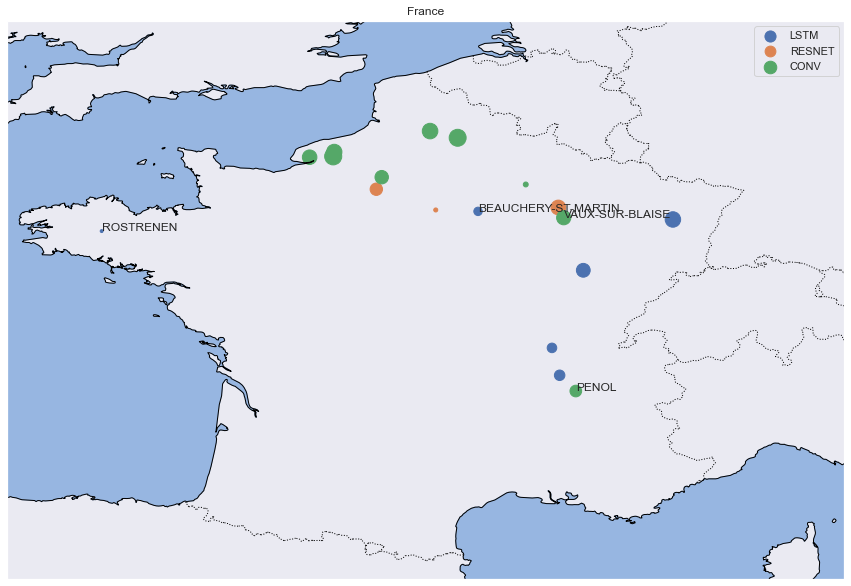

In [75]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

lstm_idx = performances['Best model'] == 'lstm'
resnet_idx = performances['Best model'] == 'Resnet'
conv_idx = performances['Best model'] == 'conv'

ax.scatter(performances.LONGITUDE[lstm_idx], performances.LATITUDE[lstm_idx], label='LSTM', s=performances['%_DONNEES_MANQUANTES'][lstm_idx]*4)
ax.scatter(performances.LONGITUDE[resnet_idx], performances.LATITUDE[resnet_idx], label='RESNET', s=performances['%_DONNEES_MANQUANTES'][resnet_idx]*4)
ax.scatter(performances.LONGITUDE[conv_idx], performances.LATITUDE[conv_idx], label='CONV', s=performances['%_DONNEES_MANQUANTES'][conv_idx]*4)

to_labelize = ['ROSTRENEN', 'PENOL', 'VAUX-SUR-BLAISE', 'BEAUCHERY-ST-MARTIN']
to_labelize_idx = performances.NOM_COMMUNE.isin(to_labelize)

for _, (lon, lat, name) in performances[to_labelize_idx][['LONGITUDE', 'LATITUDE', 'NOM_COMMUNE']].iterrows():
    ax.annotate(name, (lon, lat))

ax.set_title('France');
ax.legend();

plt.tight_layout()
# plt.savefig('Images/plot_clusters_no_label.png')
plt.savefig('Images/plot_clusters.png')

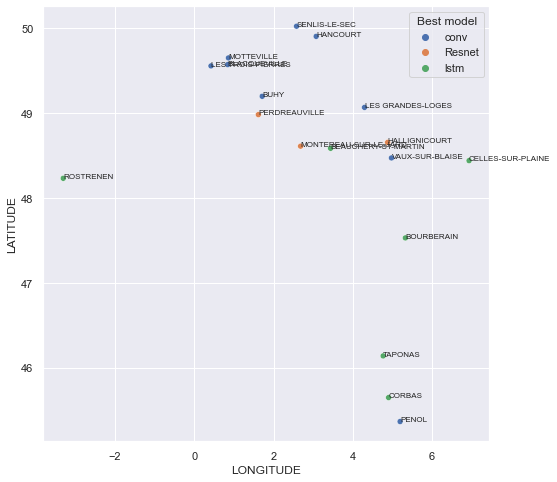

In [51]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(y='LATITUDE', x='LONGITUDE', hue='Best model', data=performances)

for _, (lon, lat, name) in performances[['LONGITUDE', 'LATITUDE', 'NOM_COMMUNE']].iterrows():
    ax.annotate(name, (lon, lat), fontsize=8)

In [52]:
performances.agg(['mean', 'std'])

,Validation loss,Test loss,Running time (min),LATITUDE,LONGITUDE,%_DONNEES_MANQUANTES
mean,0.152639,0.110699,6.009435,48.423337,3.064538,40.323889
std,0.210320,0.136816,9.222852,1.401983,2.438662,22.584433


In [42]:
performances['Running time (min)'].sum()

108.16983318726221

In [22]:
performances.set_index('BSS_ID').to_latex('performances.tex', float_format="%.2f")

In [54]:
performances['Best model'].value_counts()

conv      9
lstm      6
Resnet    3
Name: Best model, dtype: int64

In [68]:
performances.groupby('Best model').agg(['max', 'mean', 'std'])

Validation loss                     Test loss                      \
                       max      mean       std       max      mean       std   
Best model                                                                     
Resnet            0.040808  0.020807  0.018406  0.061869  0.025340  0.031670   
conv              0.229644  0.084130  0.093914  0.443117  0.097409  0.144388   
lstm              0.717148  0.321317  0.288326  0.396375  0.173314  0.143149   

           Running time (min)                         LATITUDE             \
                          max       mean        std        max       mean   
Best model                                                                  
Resnet              40.427913  16.132847  21.046225  48.981566  48.748649   
conv                14.811060   4.181817   4.032586  50.023705  48.978226   
lstm                10.686228   3.689157   3.471070  48.584797  47.428346   

                     LONGITUDE                     %_DONNEES_MANQUANTES  \
                 std       max      mean       std                  max   
Best model                                                                
Resnet      0.202934  4.876212  3.057021  1.663007                54.16   
conv        1.434087  5.190176  2.660250  1.838979                72.91   
lstm        1.253046  6.930277  3.674728  3.600252                59.73   

                                  
                 mean        std  
Best model                        
Resnet      32.180000  25.621530  
conv        50.208889  20.636868  
lstm        29.568333  20.873498

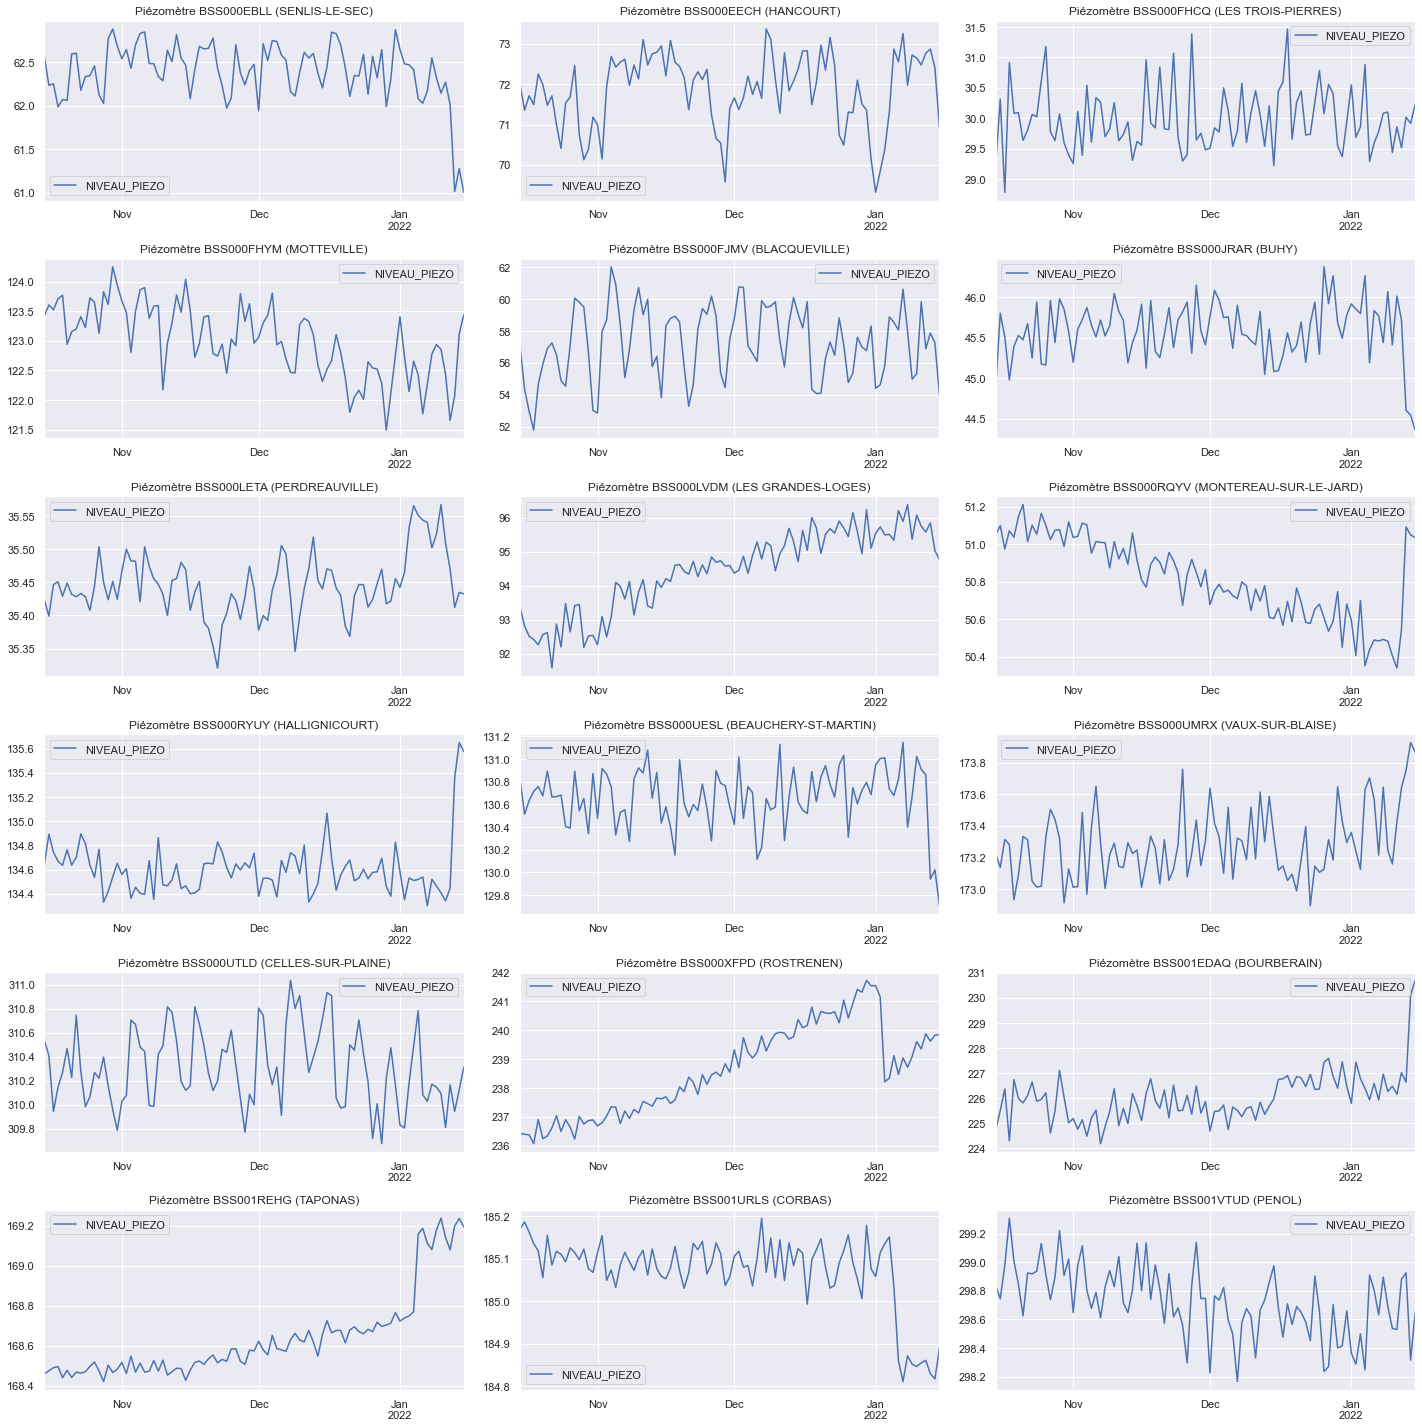

In [74]:
submission = pd.read_csv('submission.csv', index_col=0)
submission.DATE = pd.to_datetime(submission.DATE)

nrows = 6
ncols = 3

plt.figure(figsize=(20, 20))

for i, (index, row) in enumerate(performances[['BSS_ID', 'NOM_COMMUNE']].iterrows()):
    df = submission[submission.index==index]
    df = df.set_index('DATE')
    
    ax = plt.subplot(nrows, ncols, i+1)
    df.plot(ax=ax, title=f'Piézomètre {row.BSS_ID} ({row.NOM_COMMUNE})', xlabel='')

plt.tight_layout()
plt.savefig('Images/forecasts.png')